{u'boxes': [{u'box': [193.0, 482.0, 226.0, 90.0], u'is_background': False, u'id': u'e1aa4f6c553fd01b4a90c36b667ea545_train', u'is_big_box': False}, {u'box': [31.0, 311.0, 135.0, 136.0], u'is_background': False, u'id': u'939030726152341c154ba28629341da6_train', u'is_big_box': False}, {u'box': [490.0, 371.0, 111.0, 230.0], u'is_background': True, u'id': u'background_train', u'is_big_box': False}], u'name': u'e4c73bb8da3ba227beb082434d16a536.jpeg', u'is_from_user': False}
(600, 600, 3)


IOError: [Errno 2] No such file or directory: u'/home/yogesh/tomato-detect/train/0ed428d6a661b0f41d222edfb143d6b9.jpeg'

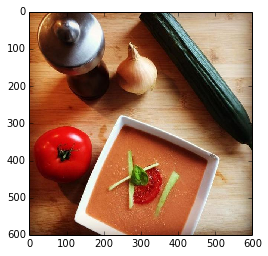

In [6]:

# Organize the data with 
# Give appropriate paths to organize the data for both train and test database
# reaplace line 21 with test_database.txt 

from skimage import io

import os
import json
from shutil import copyfile
%matplotlib inline
import matplotlib.pyplot as plt
import glob
from skimage.io import imread_collection
from skimage import io
import numpy  
import pandas as pd
path='/home/yogesh/tomato-detect/'
imgpath =os.path.join(path,'images/{}')
idsfile='id2name.txt'
traindata = json.load(open(os.path.join(path,'train_database.txt')))

id_names = json.load(open(idsfile))

print(traindata[0])
img = io.imread( imgpath.format(traindata[0]["name"]))
print(img.shape)
io.imshow(img)


rowlist = []
column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
                             
for i in range (len (traindata)):
    cur_image = traindata[i]
    file_name = cur_image['name']
    boxes = traindata[i]['boxes']
    has_tomato = False
    
    for i_box in range (len(boxes)):
        cur_box = boxes[i_box]
        box_id = cur_box['id']
        xmin = int(cur_box["box"][0])
        ymin = int(cur_box["box"][1])
        width = int(cur_box["box"][2])
        height = int(cur_box["box"][3])
        xmax = xmin + width
        ymax = ymin + height

        if cur_box["id"] == '939030726152341c154ba28629341da6_train':
            #print(id_names.get('939030726152341c154ba28629341da6_train'))
            has_tomato = True
            break
        
    src_file = path + 'train/'+ file_name
    dst_file = path + "ok/notomato/" + file_name
    if has_tomato:
        dst_file = path + 'ok/tomato/' + file_name
        value = (file_name,width,height, id_names.get('939030726152341c154ba28629341da6_train'),
                     xmin, ymin,xmax, ymax)
        rowlist.append(value)
        csvout = pd.DataFrame(rowlist,columns=column_name)  
    copyfile (src_file, dst_file)
csvout.to_csv('tomatoes_test.csv',index=None)
    
    

Found 548 images belonging to 2 classes.
(0.26539413320270144, 0.9078947281547887)


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 5)